In [4]:
from sklearn.preprocessing import LabelEncoder

In [3]:
# First Feature
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

# Second Feature
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

#Label or target variable
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

print(len(weather), len(temp), len(play))

14 14 14


In [5]:
le = LabelEncoder()

w_enc = le.fit_transform(weather)
t_enc = le.fit_transform(temp)
p_enc = le.fit_transform(play)


In [9]:
features = list(zip(w_enc, t_enc))
import numpy as np
np.array(features).shape

(14, 2)

### Model building

In [7]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()

#### Model Fitting

In [10]:
modelNB.fit(features, p_enc)

modelNB.predict([[0,2]]) #overcast, mild

array([1])

In [11]:
modelNB.score(features, p_enc)

0.7142857142857143

#### Naive Bayes Multiple Labels

In [13]:
from sklearn.datasets import load_wine

wine = load_wine()

In [19]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [14]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [15]:
wine.data.shape

(178, 13)

In [16]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [18]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

#### Splitting Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size=0.3, random_state=2024)

In [24]:
modelNB2 = GaussianNB()
modelNB2.fit(X_train, y_train)

y_pred_test = modelNB2.predict(X_test)

In [25]:
y_pred_test

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       2, 1, 0, 1, 1, 0, 0, 0, 2, 1])

In [26]:
y_test

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 1])

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [29]:
y_pred_train = modelNB2.predict(X_train)
y_pred_test = modelNB2.predict(X_test)

In [30]:
print('train set accuracy ', accuracy_score(y_train, y_pred_train))
print('test set accuracy ', accuracy_score(y_test, y_pred_test))

train set accuracy  0.9919354838709677
test set accuracy  0.9444444444444444


In [35]:
print('train set classification report\n\n', classification_report(y_train, y_pred_train))
print('test set classification report\n\n', classification_report(y_test, y_pred_test))

train set classification report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        32

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

test set classification report

               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      0.90      0.92        20
           2       0.89      1.00      0.94        16

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



#### Decision Tree

In [36]:
%pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
%pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

In [55]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

pima = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv',header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [56]:
pima.drop(0, inplace=True)

In [57]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [58]:
pima.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [59]:
for i in pima.columns:
  pima[i]=pima[i].astype(float)

In [60]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    float64
 1   glucose   768 non-null    float64
 2   bp        768 non-null    float64
 3   skin      768 non-null    float64
 4   insulin   768 non-null    float64
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    float64
 8   label     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [61]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [62]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[feature_cols]
y = pima['label']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2024)

In [64]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [65]:
print('train set \n\n', classification_report(y_train, y_pred_train))
print('test set \n\n', classification_report(y_test, y_pred_test))

train set 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

test set 

               precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       150
         1.0       0.57      0.49      0.53        81

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231



#### Visualisasi Decision Tree

In [66]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [69]:
y_train.value_counts()

0.0    350
1.0    187
Name: label, dtype: int64

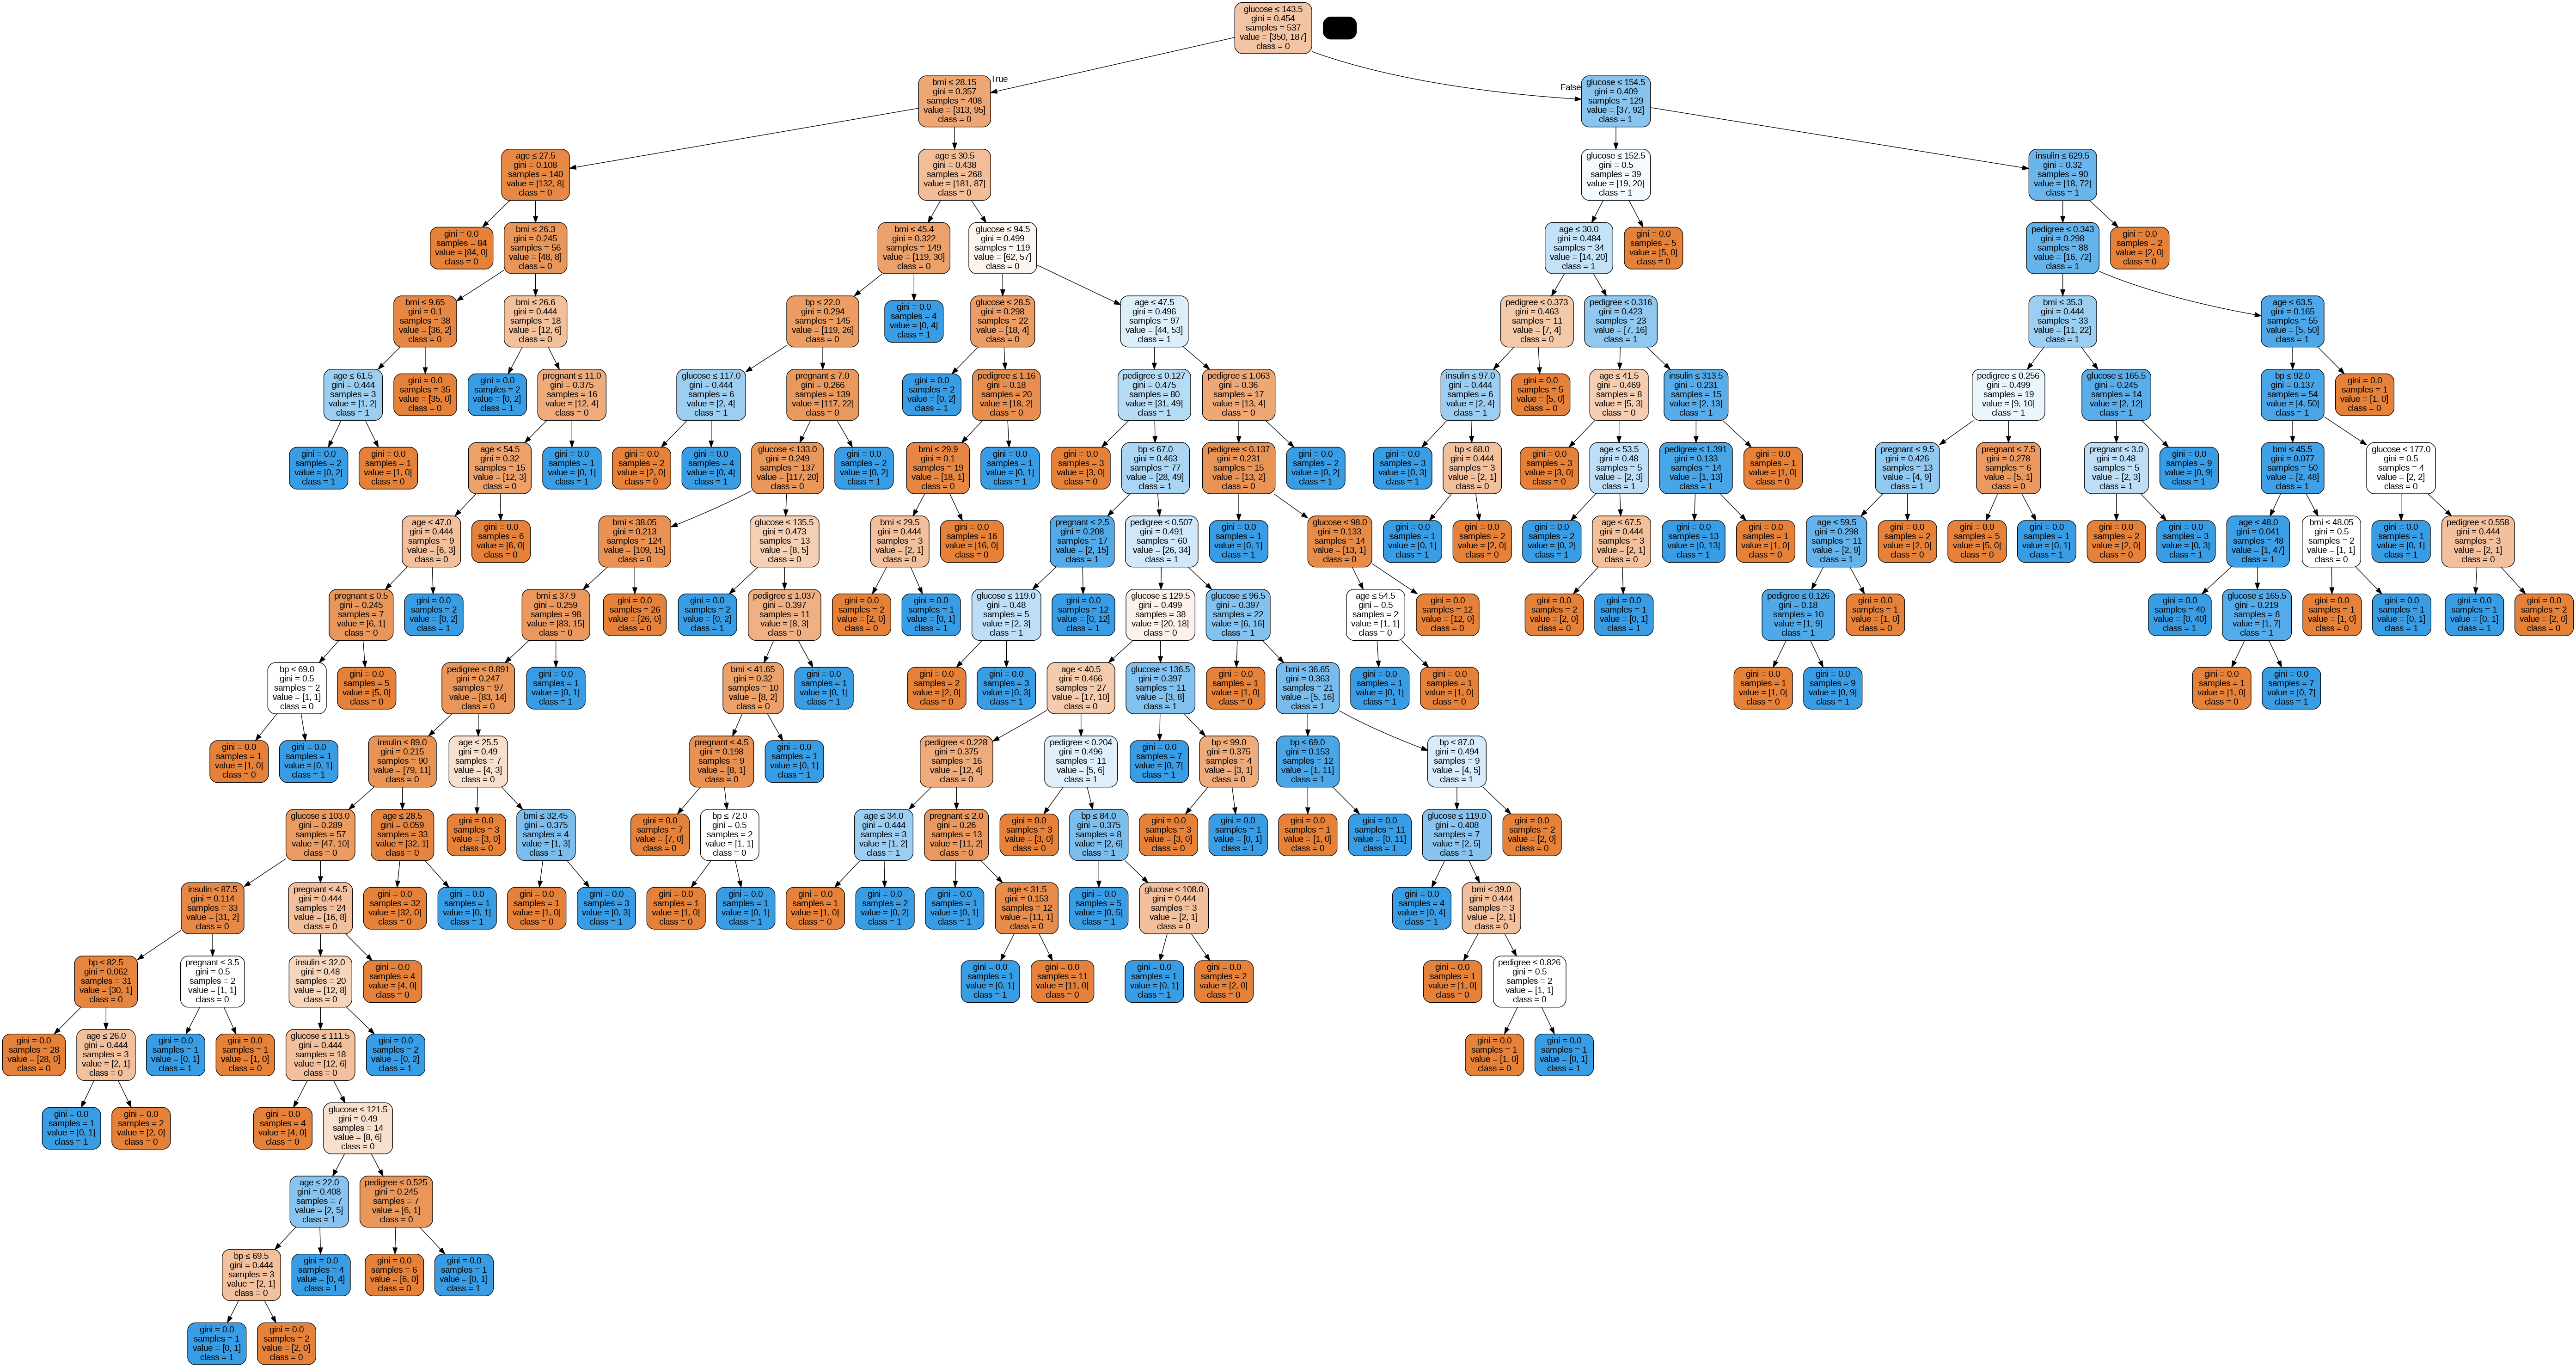

In [68]:
dot_data = StringIO()

tree.export_graphviz(dtc, out_file=dot_data,
                     class_names=['0', '1'],
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [71]:
dtc2 = DecisionTreeClassifier(max_depth=3)
dtc2.fit(X_train, y_train)

y_pred_train = dtc2.predict(X_train)
y_pred_test = dtc2.predict(X_test)

In [72]:
print('train set \n\n', classification_report(y_train, y_pred_train))
print('test set \n\n', classification_report(y_test, y_pred_test))

train set 

               precision    recall  f1-score   support

         0.0       0.77      0.91      0.84       350
         1.0       0.75      0.49      0.60       187

    accuracy                           0.77       537
   macro avg       0.76      0.70      0.72       537
weighted avg       0.77      0.77      0.75       537

test set 

               precision    recall  f1-score   support

         0.0       0.74      0.93      0.82       150
         1.0       0.74      0.40      0.52        81

    accuracy                           0.74       231
   macro avg       0.74      0.66      0.67       231
weighted avg       0.74      0.74      0.72       231



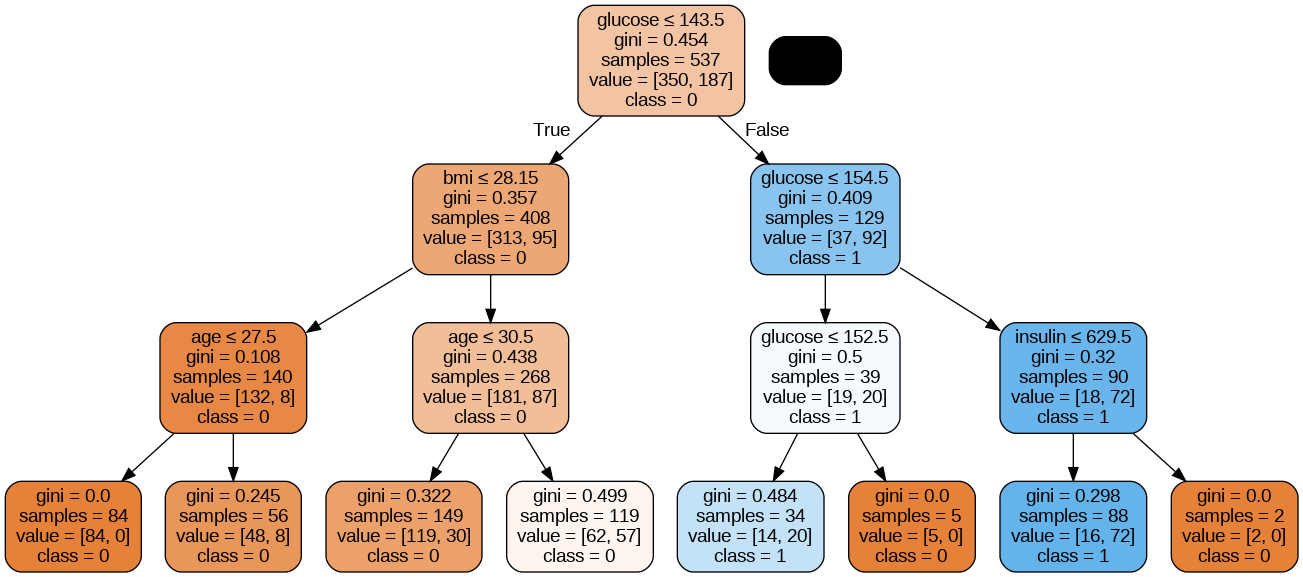

In [73]:
dot_data = StringIO()

tree.export_graphviz(dtc2, out_file=dot_data,
                     class_names=['0', '1'],
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Random Forest

In [108]:
from sklearn.datasets import load_iris

iris = load_iris()

In [109]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [110]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [111]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [112]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [113]:
df_iris['species'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
X = df_iris.drop('species', axis=1)
y = df_iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [115]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

In [116]:
print('train set \n\n', classification_report(y_train, y_pred_train))
print('test set \n\n', classification_report(y_test, y_pred_test))

train set 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

test set 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      0.83      0.80        12
           2       0.86      0.80      0.83        15

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



In [117]:
rfc.predict([[3,5,4,2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Feature Importance

In [118]:
f_i = rfc.feature_importances_

In [119]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [120]:
feature_imp = pd.Series(f_i, index=iris.feature_names)
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp

petal length (cm)    0.517989
petal width (cm)     0.363111
sepal length (cm)    0.094428
sepal width (cm)     0.024473
dtype: float64

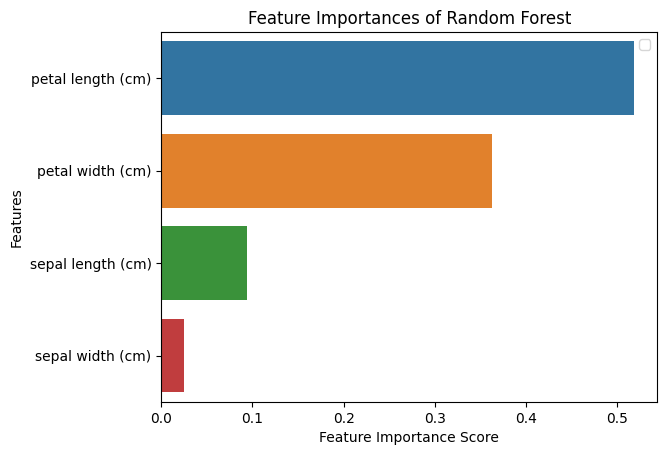

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.title('Feature Importances of Random Forest')
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.legend()
plt.show()

In [122]:
X = df_iris.drop(['sepal width (cm)', 'species'], axis=1)
y = df_iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [123]:
rfc2 = RandomForestClassifier(n_estimators =2)
rfc2.fit(X_train, y_train)

y_pred_train_2 = rfc2.predict(X_train)
y_pred_test_2 = rfc2.predict(X_test)

In [124]:
print('train set 2\n\n', classification_report(y_train, y_pred_train_2))
print('test set 2\n\n', classification_report(y_test, y_pred_test_2))

train set 2

               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.97      0.97      0.97        38
           2       1.00      0.97      0.99        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

test set 2

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.71      0.83      0.77        12
           2       0.83      0.67      0.74        15

    accuracy                           0.84        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.85      0.84      0.84        45



#### Support Vector Machine

In [125]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [126]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [127]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [128]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [129]:
df_cancer['label']=cancer.target # 0 : malignant, 1: benign

In [130]:
X = df_cancer.drop('label', axis=1)
y = df_cancer['label']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [132]:
from sklearn.svm import SVC

In [133]:
svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

y_pred_train = svc_model.predict(X_train)
y_pred_test = svc_model.predict(X_test)

In [134]:
print('train set\n\n', classification_report(y_train, y_pred_train))

train set

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       145
           1       0.98      0.99      0.98       253

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



In [135]:
print('test set\n\n', classification_report(y_test, y_pred_test))

test set

               precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.96      0.95      0.96       104

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Model Comparison

In [136]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [138]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [139]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [141]:
train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [142]:
train.Gender.fillna(train.Gender.mode()[0], inplace=True)
train.Married.fillna(train.Married.mode()[0], inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)

In [143]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [144]:
train.LoanAmount.fillna(train.LoanAmount.mean(), inplace=True)

In [147]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(), inplace=True)
train.Credit_History.fillna(train.Credit_History.mean(), inplace=True)

In [173]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

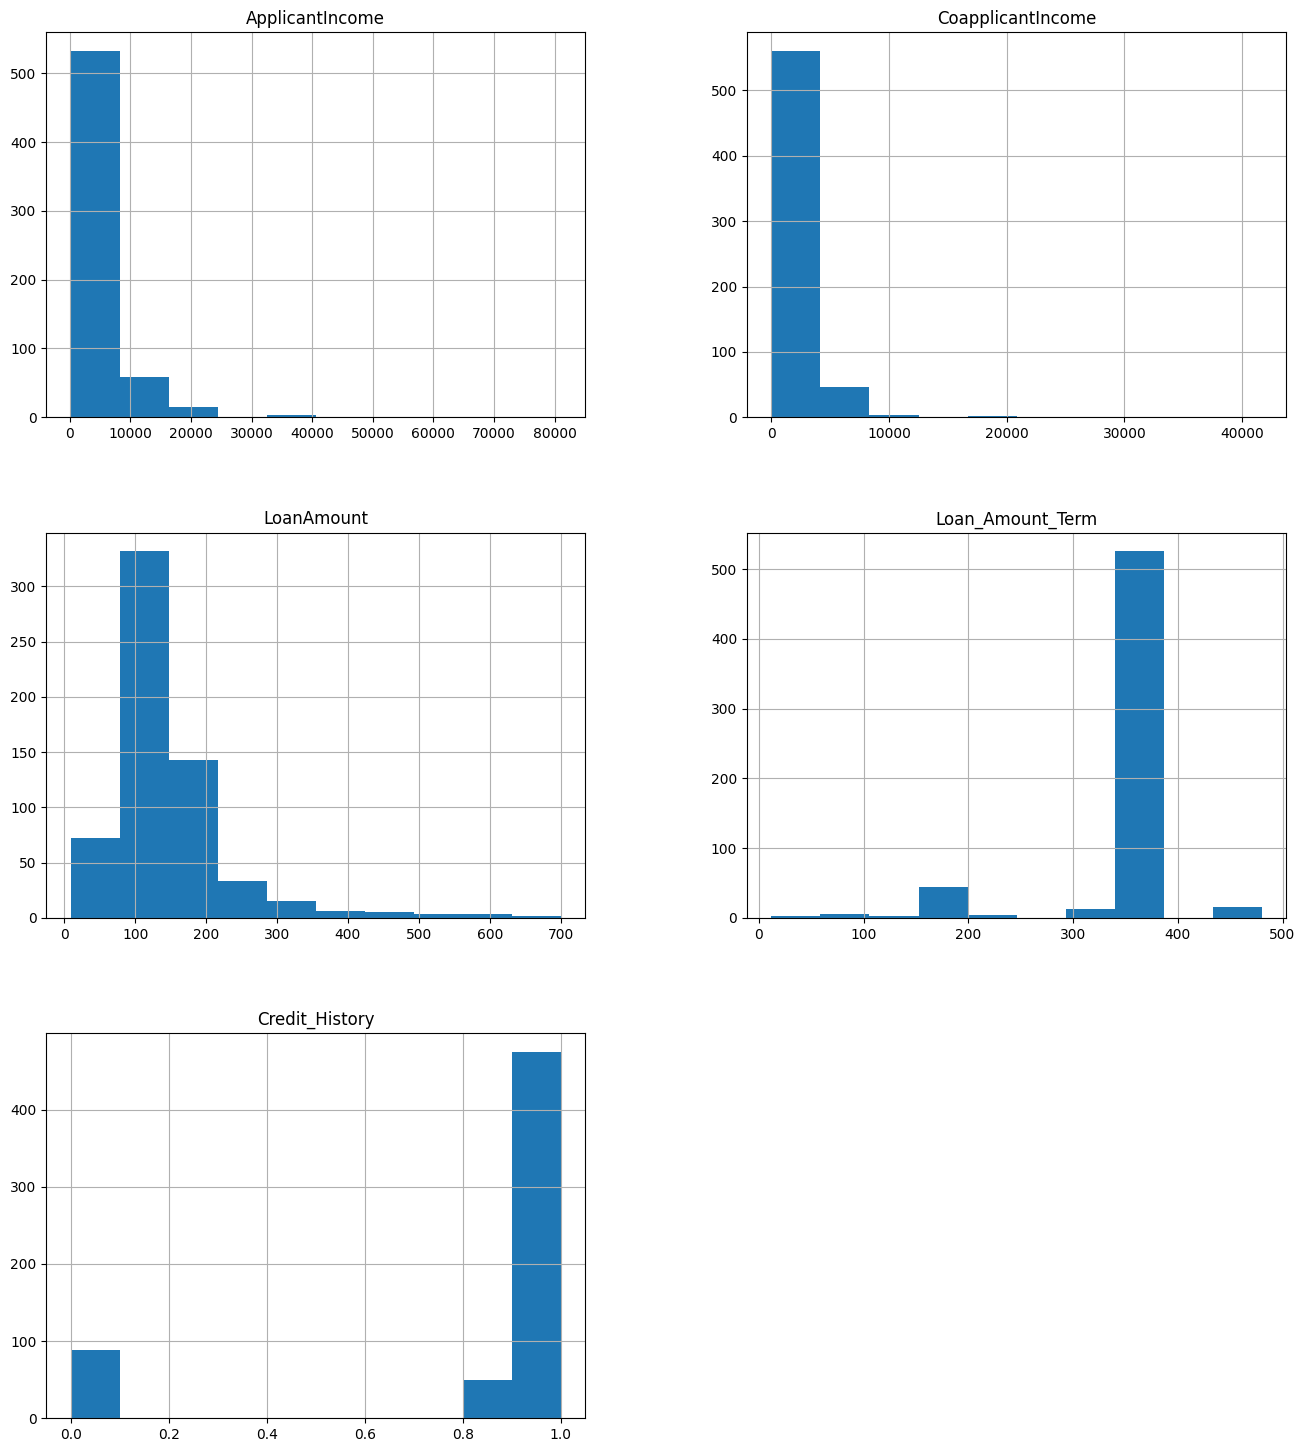

In [174]:
train.hist(figsize=(16,18))

In [175]:
train['Loan_Amount_Term'] = np.log(train.Loan_Amount_Term)

<Axes: >

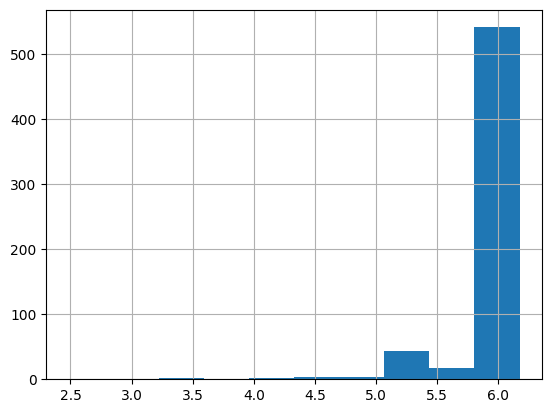

In [176]:
train['Loan_Amount_Term'].hist()

In [152]:
pd.get_dummies(X['Gender'])

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [154]:
pd.get_dummies(X.Married)

,No,Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [149]:
X = train.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = train.Loan_Status

In [156]:
X = pd.get_dummies(X)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [158]:
from sklearn.linear_model import LogisticRegression

In [160]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [162]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [163]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [164]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [169]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dtc.predict(X_test)
y_pred_rf = rfc.predict(X_test)
y_pred_sv = svc_model.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [171]:
y_pred_knn = knn.predict(X_test)

In [172]:
print('Accuracy Score')
print('Logistic Regression', accuracy_score(y_test, y_pred_lr))
print('Decision Tree', accuracy_score(y_test, y_pred_dt))
print('Random Forest', accuracy_score(y_test, y_pred_rf))
print('SVM', accuracy_score(y_test, y_pred_sv))
print('Naive Bayes', accuracy_score(y_test, y_pred_nb))
print('KNN', accuracy_score(y_test, y_pred_knn))

Accuracy Score
Logistic Regression 0.8617886178861789
Decision Tree 0.6585365853658537
Random Forest 0.8292682926829268
SVM 0.7317073170731707
Naive Bayes 0.8455284552845529
KNN 0.6422764227642277
